In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import xml.etree.ElementTree as ET
import zipfile

unzip the exported dataset from CVAT

In [28]:
zipfile_name = 'Img8_13_15'
with zipfile.ZipFile(f'{zipfile_name}.zip', 'r') as zf:
    if not os.path.exists(f'{zipfile_name}'):
        os.makedirs(f'{zipfile_name}')

    zf.extractall(f'{zipfile_name}')

# Label Box Extraction
`def labels_parser(path, image_name)` -> return label boxs of corresponding image

test: check if the box is in the right place


In [86]:
def labels_parser(path, image_name):
    tree = ET.parse(f'{path}/annotations.xml')
    root = tree.getroot()

    labels = {}
    for i, label in enumerate(root.iter('label')):
        labels[label.find('name').text] = i

    image_node = None
    for image in root.findall('image'):
        if image.get('name') == image_name:
            image_node = image

    boxs = []
    coordinates = ['xtl', 'ytl', 'xbr', 'ybr']
    for i in range(len(labels)):
        boxs.append([])
    for box in image_node.findall('box'):
        points = []
        for coordinate in coordinates:
            points.append(int(box.get(coordinate).split(".")[0]))
        boxs[labels[box.get('label')]].append(points)

    return boxs
boxs = labels_parser(zipfile_name, 'WLT_350_210926 P_2111131 WLT_350_210926__008 P_2111131_processed.JPG')
for i in range(len(boxs)):
    print(boxs[i])

[[[1486, 157, 1526, 227], [925, 139, 995, 214]], [[1835, 251, 1883, 300], [1463, 512, 1550, 562]], [[488, 121, 666, 191], [1357, 125, 1464, 260], [668, 129, 910, 235], [121, 129, 242, 228], [1563, 212, 1736, 286], [2280, 207, 2460, 272], [63, 128, 102, 225], [275, 132, 477, 187], [1251, 119, 1352, 169], [1894, 208, 2192, 260], [1738, 209, 1836, 261], [1138, 208, 1247, 271], [1986, 283, 2152, 384], [918, 202, 1133, 248], [1027, 125, 1229, 195], [1553, 125, 2454, 207]], [[2169, 429, 2283, 514], [1801, 427, 2152, 518], [104, 410, 633, 493]], []]


boxs = labels_parser(zipfile_name, 'WLT_350_210926 P_2111131 WLT_350_210926__008 P_2111131_processed.JPG')


WLT_350_210926 P_2111131 WLT_350_210926__008 P_2111131_processed.JPG
[488, 121, 666, 191]
[1357, 125, 1464, 260]
[668, 129, 910, 235]
[121, 129, 242, 228]
[1563, 212, 1736, 286]
[2280, 207, 2460, 272]
[63, 128, 102, 225]
[275, 132, 477, 187]
[1251, 119, 1352, 169]
[1894, 208, 2192, 260]
[1738, 209, 1836, 261]
[1138, 208, 1247, 271]
[1986, 283, 2152, 384]
[918, 202, 1133, 248]
[1027, 125, 1229, 195]
[1553, 125, 2454, 207]


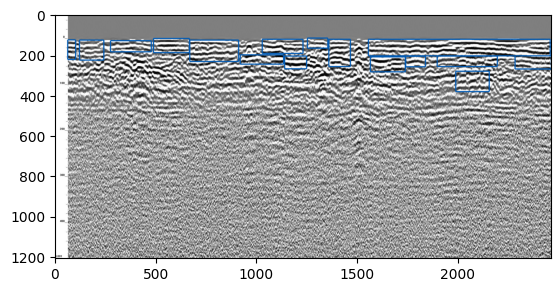

In [142]:
test_image = 'WLT_350_210926 P_2111131 WLT_350_210926__008 P_2111131_processed.JPG'
flag = 2
boxs = labels_parser(zipfile_name, test_image)

print(test_image)
img = cv2.imread(f'{zipfile_name}/images/{test_image}')
box_width = 3
for box in boxs[flag]:
    print(box)
    for i in range(3):
        img[box[1] - box_width:box[1] + box_width, box[0]:box[2], i] = 90 * i * np.ones_like(img[box[1] - box_width:box[1] + box_width, box[0]:box[2], i])
        img[box[3] - box_width:box[3] + box_width, box[0]:box[2], i] = 90 * i * np.ones_like(img[box[3] - box_width:box[3] + box_width, box[0]:box[2], i])
        img[box[1]:box[3], box[0] - box_width:box[0] + box_width, i] = 90 * i * np.ones_like(img[box[1]:box[3], box[0] - box_width:box[0] + box_width, i])
        img[box[1]:box[3], box[2] - box_width:box[2] + box_width, i] = 90 * i * np.ones_like(img[box[1]:box[3], box[2] - box_width:box[2] + box_width, i])

plt.imshow(img)
plt.show()

In [137]:
def check_box(sliding_window, box, overlapping):
    if sliding_window[2] < box[0] or sliding_window[0] > box[2]:
        return False
    if sliding_window[3] < box[1] or sliding_window[1] > box[3]:
        return False
    
    box_area = (box[2] - box[0]) * (box[3] - box[1])
    overlap_area = (min(sliding_window[2], box[2]) - max(sliding_window[0], box[0])) * (min(sliding_window[3], box[3]) - max(sliding_window[1], box[1]))
    if overlap_area / box_area < overlapping:
        return False    
    
    return True

WLT_350_210926 P_2111131 WLT_350_210926__008 P_2111131_processed.JPG
check IMAGE_START


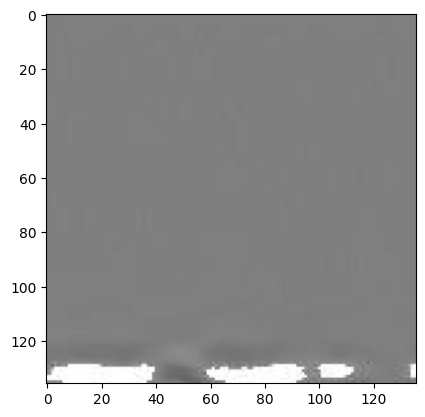

check AXIS_ZERO


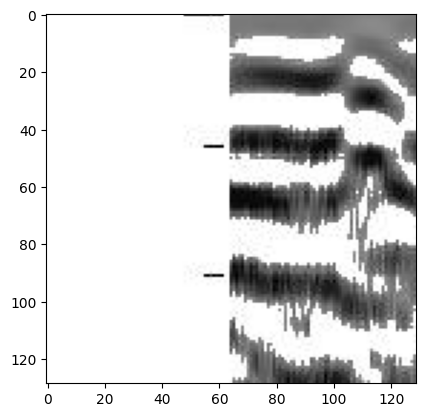

WLT_350_210926 P_2111131 WLT_350_210926__013 P_2111131_processed.JPG
check IMAGE_START


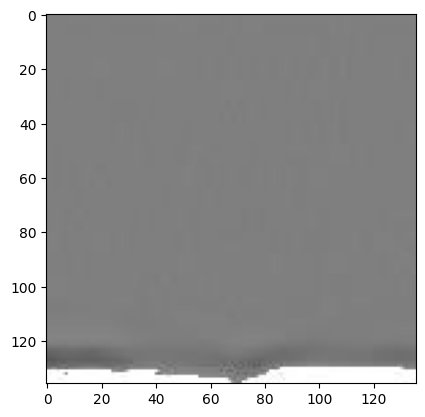

check AXIS_ZERO


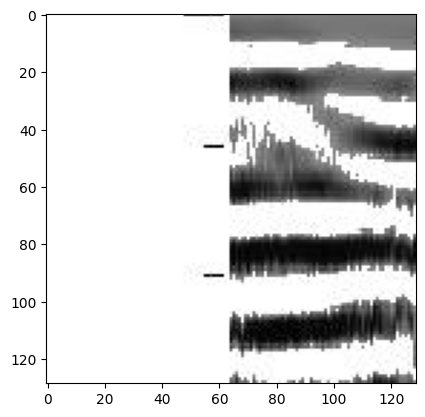

WLT_350_210926 P_2111131 WLT_350_210926__015 P_2111131_processed.JPG
check IMAGE_START


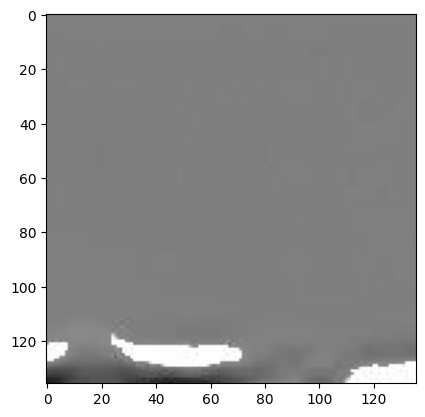

check AXIS_ZERO


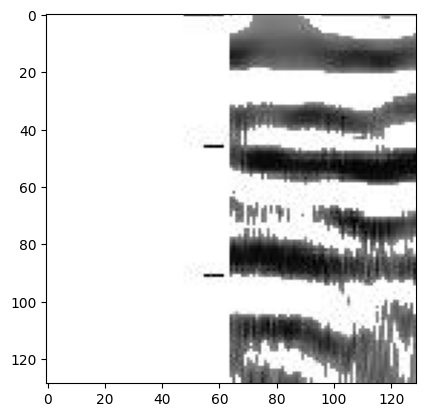

In [66]:
# Check image boundary
# Boundary constant of images
IMAGE_START = 64
AXIS_ZERO = 121

for image_name in os.listdir(f'{zipfile_name}/images'):
    print(image_name)
    img = cv2.imread(f'{zipfile_name}/images/{image_name}')

    print('check IMAGE_START') 
    plt.imshow(img[:200 - IMAGE_START, IMAGE_START:200])
    plt.show()

    print('check AXIS_ZERO') 
    plt.imshow(img[AXIS_ZERO:250, :250 - AXIS_ZERO])
    plt.show()

# Flag of the feature type
- strong hyperbola: 0
- weak hyperbola: 1
- strong reflector: 2
- weak reflector: 3
- other: 4
- no feature: 5

In [93]:
def crop_image(save_path, image_name, boxs, flag, overlapping, sliding_window_size=200, step=100, count=0):
    img = cv2.imread(f'{save_path}/{image_name}')
    feature_type = ['strong hyperbola', 'weak hyperbola', 'strong reflector', 'weak reflector', 'other', 'no feature']
    # exclude the left axis and data above 0 ms
    img = img[AXIS_ZERO:, IMAGE_START:]

    if not os.path.exists(f'{save_path}/cropped/{sliding_window_size}_{step}/{flag}'):
        os.makedirs(f'{save_path}/cropped/{sliding_window_size}_{step}/{flag}')

    for j in range(0, img.shape[0] - 1, step):
        for i in range(0, img.shape[1] - 1, step):
            if j + sliding_window_size > img.shape[0] - 1 or i + sliding_window_size > img.shape[1] - 1:
                continue

            sliding_window = [i, j, i + sliding_window_size, j + sliding_window_size]
            if flag < 5:
                for box in boxs[flag]:
                    # Check if the box is overlapping over 80%, if not don't label it            
                    if check_box(sliding_window, box, overlapping):
                        sub_img = img[j:j + sliding_window_size, i:i + sliding_window_size]
                        cv2.imwrite(f'{save_path}/cropped/{sliding_window_size}_{step}/{flag}/{count}.jpg', sub_img)
                        count += 1
                        break
            else:
                all_boxs = [box for label_type in boxs for box in label_type]
                for box in all_boxs:
                    if not check_box(sliding_window, box, 1 - overlapping):
                        sub_img = img[j:j + sliding_window_size, i:i + sliding_window_size]
                        cv2.imwrite(f'{save_path}/cropped/{sliding_window_size}_{step}/{flag}/{count}.jpg', sub_img)
                        count += 1
                        break
    print(f'generate {count} images of {feature_type[flag]}')
    return count

In [143]:
flag = 2

save_path = 'processed'
count = 0
for image_name in os.listdir(f'{zipfile_name}/images'):
    boxs = labels_parser(zipfile_name, image_name)
    count += crop_image(save_path, image_name, boxs, flag, 0.8, sliding_window_size=300, step=20, count=count)

generate 880 images of strong reflector
generate 1110 images of strong reflector
generate 3627 images of strong reflector
